<a href="https://colab.research.google.com/github/GenaroGA/Optimizacion-II/blob/dev-branch/Copia_de_Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import networkx as nx

Datos

---



In [42]:
Datos = pd.read_csv("https://drive.google.com/uc?id=1D5mZNcozs7i1NnZTAvmHcn3RxFUXkNrE")
Datos

,Indice,Origen,Destino,Valor
0,1,1,2,10
1,2,1,3,12
2,3,1,4,8
3,4,1,6,6
4,5,1,8,4
5,6,1,9,2
6,7,2,6,14
7,8,2,7,3
8,9,3,1,8
9,10,3,2,10


In [43]:
Red = nx.from_pandas_edgelist(df=Datos,source="Origen",target="Destino",edge_attr="Valor")
Red.nodes()

NodeView((1, 2, 3, 4, 6, 8, 9, 7, 5))

In [44]:
Red.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 6), (1, 8), (1, 9), (2, 6), (2, 7), (2, 3), (2, 4), (2, 5), (2, 8), (3, 4), (3, 5), (3, 9), (3, 6), (3, 8), (4, 5), (4, 7), (4, 8), (4, 9), (6, 5), (6, 8), (6, 9), (6, 7), (8, 7), (8, 5), (8, 9), (9, 5), (9, 7), (7, 5)])

Dijkstra

---




In [45]:
Dijkstra=nx.dijkstra_path(Red,source=2,target=6,weight='Valor')
Dijkstra

[2, 5, 6]

In [46]:
r = nx.shortest_path(Red, source=2, weight='Valor')
r


{1: [2, 5, 9, 1],
 2: [2],
 3: [2, 5, 3],
 4: [2, 4],
 5: [2, 5],
 6: [2, 5, 6],
 7: [2, 7],
 8: [2, 5, 8],
 9: [2, 5, 9]}

In [47]:
lon = nx.shortest_path_length(Red, source=2, target=6, weight='Valor')
lon

4

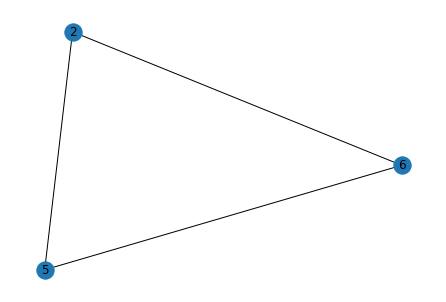

In [48]:
ruta=Red.subgraph(Dijkstra)
nx.draw(ruta,with_labels=True)


Árbol de expansión mínima

---




In [49]:
def AEM(RED, NODO_INICIAL):
    distmin = {}   
    suma= 0
    lista = {}
    Nodos_apagados = list(RED.nodes()) 
    MAXDIST = 9999
    for v in RED.nodes():
        distmin[v] = MAXDIST
        lista[v] = 0
    distmin[NODO_INICIAL] = 0
    while Nodos_apagados:
        u = Nodos_apagados[0]
        for v in Nodos_apagados:
            if (distmin[v] < distmin[u]):
                u = v
        Nodos_apagados.remove(u)
        '''suma= suma+distmin[u]'''
        for v in RED.adj[u]:
            if (v in Nodos_apagados) and (RED[u][v]['Valor'] < distmin[v]):
                lista[v] = u
                distmin[v] = RED[u][v]['Valor']
    return lista
    ''',suma'''

In [50]:
Resultado=AEM(Red,1)
Resultado

{1: 0, 2: 5, 3: 9, 4: 2, 5: 9, 6: 5, 7: 2, 8: 9, 9: 1}

In [51]:
Matriz =Resultado.items()
DF = pd.DataFrame(Matriz)
DF.columns = ["Nodo","Nodo de conexion"]
DF["Nodo de conexion"] = DF["Nodo de conexion"].astype(int)
DF


,Nodo,Nodo de conexion
0,1,0
1,2,5
2,3,9
3,4,2
4,6,5
5,8,9
6,9,1
7,7,2
8,5,9


20

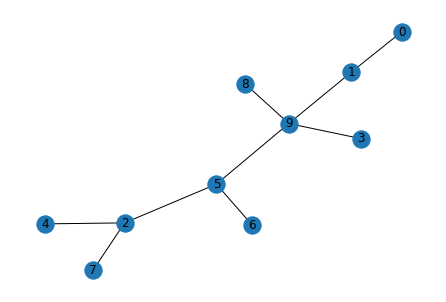

In [52]:
RedPRIM = nx.from_pandas_edgelist(df=DF,source="Nodo de conexion",target="Nodo")
nx.draw(RedPRIM,with_labels=True)